In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
import os
import copy
from sklearn.model_selection import train_test_split

In [3]:
# Function to load datasets
def get_dataset(obj_name):
    filename_labels = 'train_labels.npy'
    filename_origin = 'origin_cifar10.npy'
    filename_small_noise = 'small_noise_cifar10.npy'
    filename_medium_noise = 'medium_noise_cifar10.npy'
    filename_large_noise = 'large_noise_cifar10.npy'
    
    train_set = None
    match obj_name:
        case 'origin':
            train_set = np.load(filename_origin)
        case 'small_noise':
            train_set = np.load(filename_small_noise)
        case 'medium_noise':
            train_set = np.load(filename_medium_noise)
        case 'large_noise':
            train_set = np.load(filename_large_noise)
        case _:
            raise ValueError(f"Unknown obj_name: {obj_name}")
    label_set = np.load(filename_labels) if train_set.size > 0 else None

    if label_set is None or train_set is None:
        print("Run Noise_process.ipynb before running this file")
    return train_set, label_set

In [4]:
ORIGIN = 'origin'
SMALL = 'small_noise'
MEDIUM = 'medium_noise'
LARGE = 'large_noise'
all_dataset = [ORIGIN, SMALL, MEDIUM, LARGE]


In [5]:
# MLP: learning_rate, num_units, dropout_rate
best_config_origin_mlp = {'name': ORIGIN, 'num_units': 512}
best_config_small_mlp = {'name': SMALL, 'num_units': 256}
best_config_medium_mlp = {'name': MEDIUM, 'num_units': 512}
best_config_large_mlp = {'name': LARGE, 'num_units': 512}
best_config_mlp = [
    best_config_origin_mlp, best_config_small_mlp, best_config_medium_mlp, best_config_large_mlp
]


Build Model

In [7]:
# Function to build MLP model
def build_mlp_model(num_units, learning_rate=0.0005, dropout_rate=0, input_shape=(32, 32, 3), num_classes=10):
    model = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Function to process dataset
def get_processed_dataset(model_name):
    train_set, label_set = get_dataset(model_name)
    X_combined_reshaped = train_set.reshape(-1, 32, 32, 3)
    X_combined_reshaped = X_combined_reshaped.astype('float32') / 255.0
    y_combined_categorical = to_categorical(label_set, num_classes=10)
    return X_combined_reshaped, y_combined_categorical

In [9]:
# Function to plot learning curves
def plot_learning_curves(all_history, model_name):
    train_loss = np.mean([h['loss'] for h in all_history], axis=0)
    val_loss = np.mean([h['val_loss'] for h in all_history], axis=0)
    train_accuracy = np.mean([h['accuracy'] for h in all_history], axis=0)
    val_accuracy = np.mean([h['val_accuracy'] for h in all_history], axis=0)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Loss Curve {model_name} MLP')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title(f'Accuracy Curve {model_name} MLP')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

Fold 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Run origin, in small_noise at Fold 1/20: Accuracy: 0.3425, Precision: 0.3887595657896531, Recall: 0.3422909679733187
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run origin, in medium_noise at Fold 1/20: Accuracy: 0.33666666666666667, Precision: 0.37812519094780395, Recall: 0.3366610645434153
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run origin, in large_noise at Fold 1/20: Accuracy: 0.22333333333333333, Precision: 0.28428184227425457, Recall: 0.22573770514673241
Fold 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Run origin, in small_noise at Fold 2/20: Accuracy: 0.3416666666666667, Precision: 0.428103913594977, Recall: 0.34003630691342557
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run origin, in medium_noise at Fold 2/20: Accuracy: 0.35583333333333333, Precision: 0.4087152219500575, Recall: 0.35479701446919576
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run origin, in large_noise at Fold 2/20: Accuracy: 0.23083333333333333, Precision: 0.39654207310347883, 

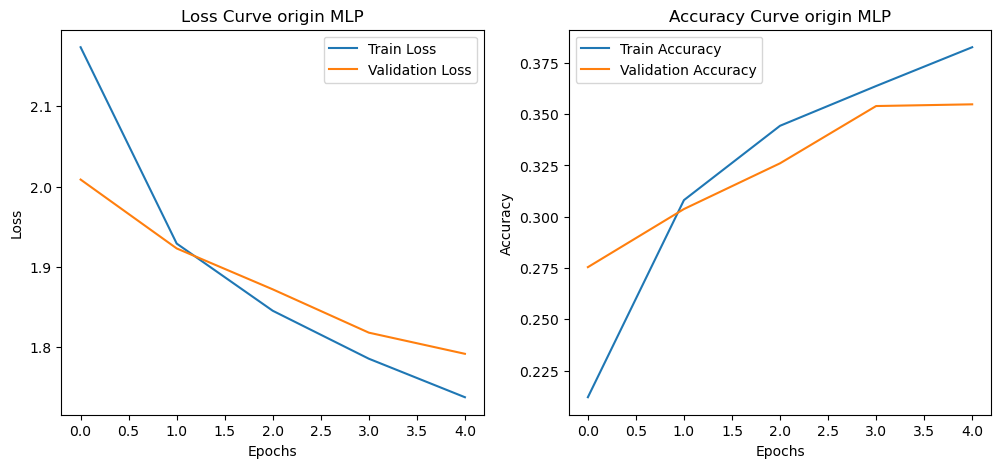

Fold 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Run small_noise, in origin at Fold 1/20: Accuracy: 0.3591666666666667, Precision: 0.4223670679981864, Recall: 0.3561566866810419
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Run small_noise, in medium_noise at Fold 1/20: Accuracy: 0.35333333333333333, Precision: 0.41269775954497917, Recall: 0.3508951445508557
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
Run small_noise, in large_noise at Fold 1/20: Accuracy: 0.245, Precision: 0.3715845188698399, Recall: 0.24167744163230526
Fold 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run small_noise, in origin at Fold 2/20: Accuracy: 0.3908333333333333, Precision: 0.41494166945900285, Recall: 0.3864431751250469
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Run small_noise, in medium_noise at Fold 2/20: Accuracy: 0.38083333333333336, Precision: 0.39684403597622997, Recall: 0.37579406406661386
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Run small_noise, in large_noise at Fold 2/20: Accuracy: 0.24416666666666667, Precision: 

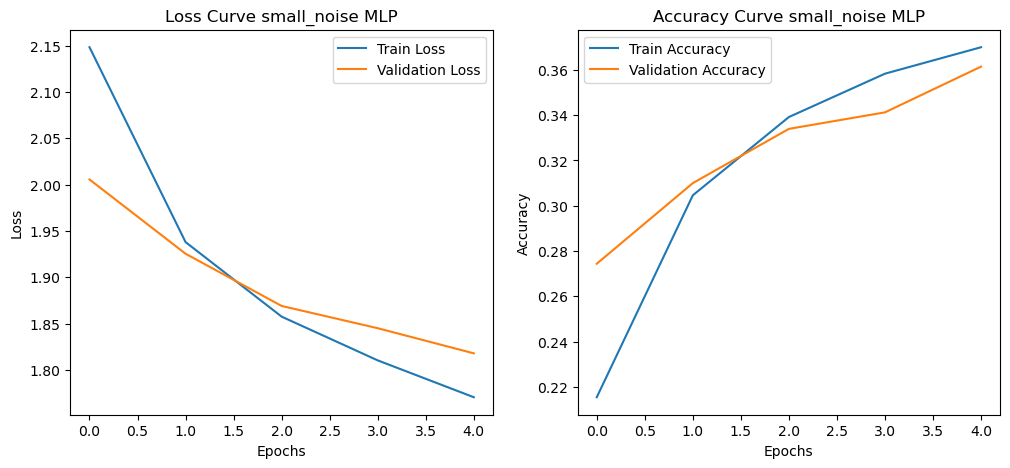

Fold 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Run medium_noise, in origin at Fold 1/20: Accuracy: 0.31666666666666665, Precision: 0.3902008379750731, Recall: 0.31362859559992945
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run medium_noise, in small_noise at Fold 1/20: Accuracy: 0.32166666666666666, Precision: 0.3871565860437747, Recall: 0.31786738505905787
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run medium_noise, in large_noise at Fold 1/20: Accuracy: 0.25583333333333336, Precision: 0.34626718861525607, Recall: 0.25170995900439525
Fold 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Run medium_noise, in origin at Fold 2/20: Accuracy: 0.3575, Precision: 0.4100885507482556, Recall: 0.35069107433956365
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run medium_noise, in small_noise at Fold 2/20: Accuracy: 0.3425, Precision: 0.41582473566673955, Recall: 0.3352460706451495
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run medium_noise, in large_noise at Fold 2/20: Accuracy: 0.2225, Precision: 0.31543169713565666,

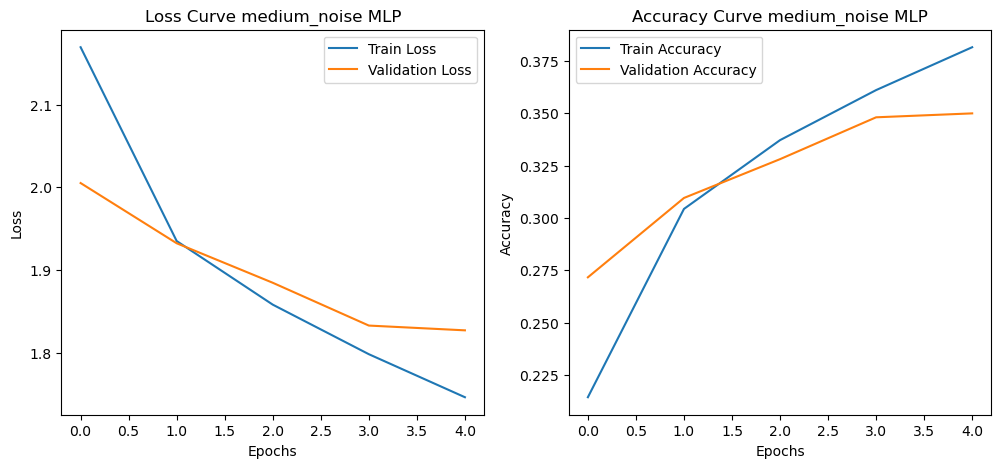

Fold 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Run large_noise, in origin at Fold 1/20: Accuracy: 0.31333333333333335, Precision: 0.3878143921266498, Recall: 0.31488325863524824
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run large_noise, in small_noise at Fold 1/20: Accuracy: 0.31666666666666665, Precision: 0.38855714008653386, Recall: 0.3182508859232146
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Run large_noise, in medium_noise at Fold 1/20: Accuracy: 0.3075, Precision: 0.36552964953871914, Recall: 0.30910605247123296
Fold 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Run large_noise, in origin at Fold 2/20: Accuracy: 0.2925, Precision: 0.34571843279488246, Recall: 0.2951570506624302
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run large_noise, in small_noise at Fold 2/20: Accuracy: 0.3025, Precision: 0.36250029092084024, Recall: 0.304667440309629
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Run large_noise, in medium_noise at Fold 2/20: Accuracy: 0.2791666666666667, Precision: 0.3302701492723399, Recall

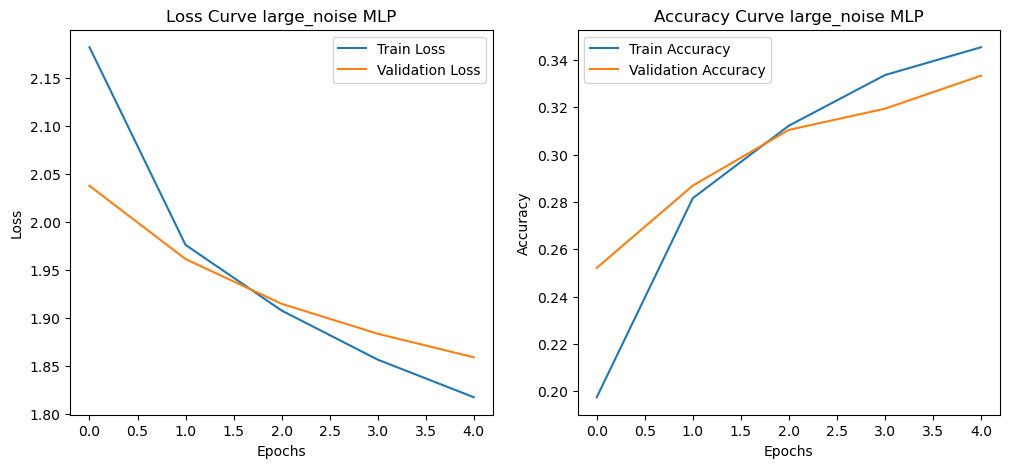

In [10]:
# Train and evaluate MLP models for all configurations
all_performance_mlp = {}
all_histories = {}

for config in best_config_mlp:
    model_name = config['name']
    model_performance = {}

    # Use 80% for cross validation and 20% for robustness test for other model
    x_processed, y_processed = get_processed_dataset(model_name)
    x_cv, _, y_cv, _ = train_test_split(x_processed, y_processed, test_size=0.2, random_state=42)

    # Cross Validation
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    all_history = []

    for fold, (train_index, val_index) in enumerate(kf.split(x_cv)):
        print(f'Fold {fold + 1}/{20}')

        model = build_mlp_model(config['num_units'])

        x_train, x_val = x_cv[train_index], x_cv[val_index]
        y_train, y_val = y_cv[train_index], y_cv[val_index]

        history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val), verbose=0)
        all_history.append(history.history)
        model_performance_fold = {}

        # Robustness Test
        for dataset_name in all_dataset:
            if dataset_name == model_name:
                # Skip robustness evaluation for the same dataset
                continue

            x_evaluated, y_evaluated = get_processed_dataset(dataset_name)
            _, x_test, _, y_test = train_test_split(x_evaluated, y_evaluated, test_size=0.2, random_state=42)

            y_pred = model.predict(x_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_test, axis=1) 

            accuracy = accuracy_score(y_true_classes, y_pred_classes)
            precision = precision_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
            recall = recall_score(y_true_classes, y_pred_classes, average='macro')

            print(f"Run {model_name}, in {dataset_name} at Fold {fold + 1}/{20}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
            model_performance_fold[dataset_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}
        
        model_performance[fold+1] = model_performance_fold

    all_performance_mlp[model_name] = model_performance

    # Plot learning curves for each model
    plot_learning_curves(all_history, model_name)
    all_histories[model_name] = all_history


In [19]:
all_performance_mlp[SMALL][1][ORIGIN]

{'accuracy': 0.3591666666666667,
 'precision': 0.4223670679981864,
 'recall': 0.3561566866810419}

In [79]:
def show_plt(data_dict, name):
    noise_levels = list(data_dict.keys())
    accuracy = [data_dict[noise]['accuracy'] for noise in noise_levels]
    precision = [data_dict[noise]['precision'] for noise in noise_levels]
    recall = [data_dict[noise]['recall'] for noise in noise_levels]

    x = np.arange(len(noise_levels)) 
    width = 0.23

    plt.figure(figsize=(7, 6))

    bars1 = plt.bar(x - width, accuracy, width, label='Accuracy')
    bars2 = plt.bar(x, precision, width, label='Precision')
    bars3 = plt.bar(x + width, recall, width, label='Recall')

    for bars in (bars1, bars2, bars3):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

    plt.title(f'Model Performance under Different Noise Levels for {name} model')
    plt.xlabel('Noise Level')
    plt.ylabel('Score')
    plt.xticks(x, noise_levels) 
    plt.ylim(0, 0.6)  
    plt.legend()
    plt.grid(axis='y') 
    plt.tight_layout()

    plt.show()

In [81]:
all_metrics = {}
for model_name in all_dataset:
    dataset_record = {}
    for dataset_name in all_dataset:
        if dataset_name == model_name:
            continue
        dataset_record[dataset_name] = {'accuracy':[], 'precision':[], 'recall':[]}
    all_metrics[model_name] = dataset_record
    for i in range(1, 21):
        for dataset in all_dataset:
            if model_name != dataset:
                dataset_record[dataset]['accuracy'].append(all_performance_mlp[model_name][i][dataset]['accuracy'])
                dataset_record[dataset]['precision'].append(all_performance_mlp[model_name][i][dataset]['precision'])
                dataset_record[dataset]['recall'].append(all_performance_mlp[model_name][i][dataset]['recall'])

In [83]:
for model_name in all_dataset:
    for dataset_name in all_dataset:
        if dataset_name == model_name:
            continue
        all_metrics[model_name][dataset_name]['accuracy'] = np.mean(all_metrics[model_name][dataset_name]['accuracy'])
        all_metrics[model_name][dataset_name]['precision'] = np.mean(all_metrics[model_name][dataset_name]['precision'])
        all_metrics[model_name][dataset_name]['recall'] = np.mean(all_metrics[model_name][dataset_name]['recall'])

all_metrics[ORIGIN]

{'small_noise': {'accuracy': 0.362375,
  'precision': 0.4038830543609877,
  'recall': 0.3600827268150665},
 'medium_noise': {'accuracy': 0.3575833333333333,
  'precision': 0.38869003251240286,
  'recall': 0.3557919466587208},
 'large_noise': {'accuracy': 0.24775,
  'precision': 0.33084043753448095,
  'recall': 0.24570399797574077}}

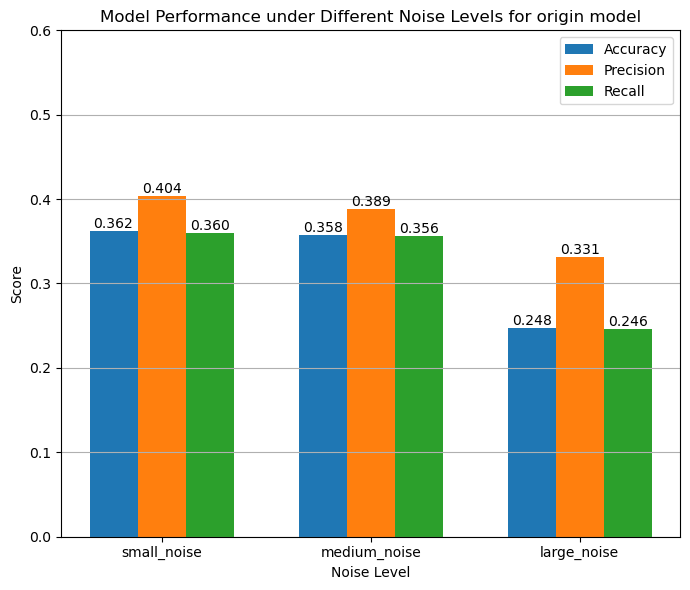

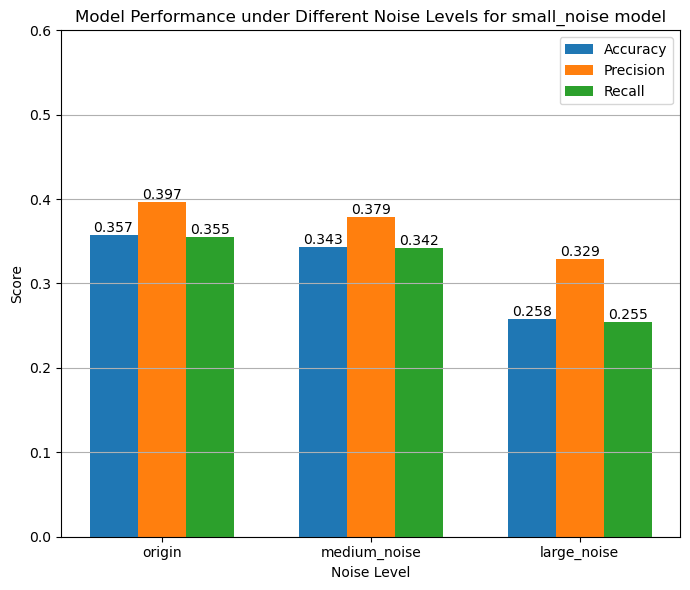

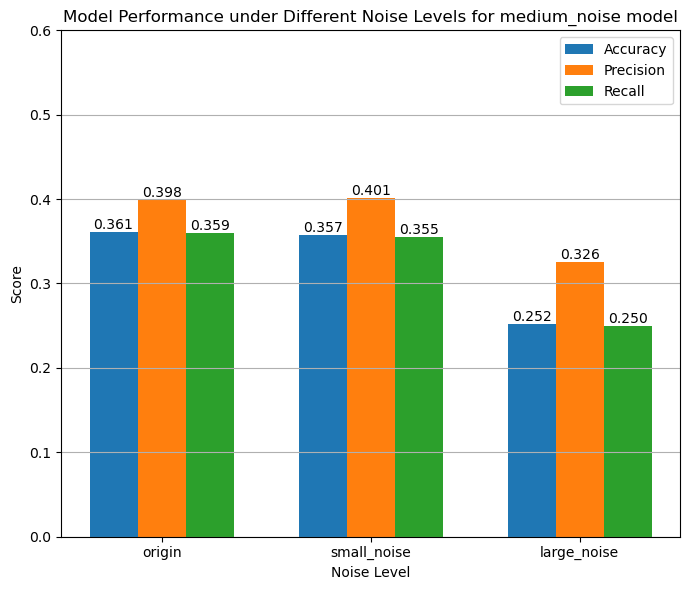

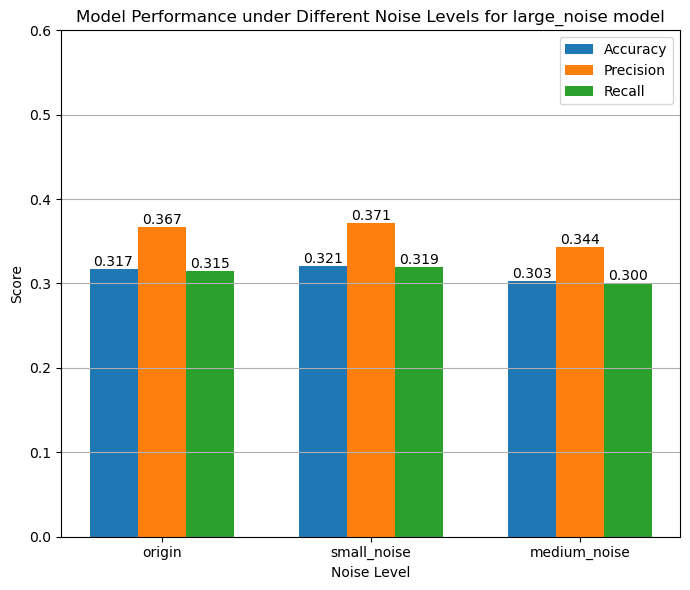

In [90]:
show_plt(all_metrics[ORIGIN], ORIGIN)
show_plt(all_metrics[SMALL], SMALL)
show_plt(all_metrics[MEDIUM], MEDIUM)
show_plt(all_metrics[LARGE], LARGE)